<a href="https://colab.research.google.com/github/maheshkumar30/Intellipaat-DataScience/blob/main/K_Means_Alg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**K-Means Clustering**
K-means is an unsupervised learning algorithm. Its goal is to find groups (clusters) in the data
###**Working of K-Means**
1. **Choose k:** We decide first how many clusters (k) you want to find
2. **Initializing Centroids:** The algorithm randomly places 'K' Points (Centroids) in the data
3. **Assign points:** It assigns each data point to it's nearest centroid. This forms 'k' cluster
4. **Updating Centroids:** It recalculates the center of each lcuster (The mean) and move the centroid to that new Center
5. **Repeating:** It Repeats step 3 and 4 until the centroids stop moving, means the cluster are stable

**Key Concept**
* **Centroid:** The mean (average) of all the points within a cluster
* **WCSS (Witihin-cluster sum of squares)/Inertia:** It is the score that k means tries to minimize. It is the sum of squared distance betweenn each point and its assigned centroid. A lower WCSS means the cluster are tighter and more compact


**Hands On**

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris # Sample Dataset

In [155]:
iris=load_iris()

In [156]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

* The features are present in "feature_names"
* The True labels:"target_names"

In [157]:
x=iris.data
y=iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [158]:
feature_names,target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [159]:
x[:5],y[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

**Basic EDA**

We will convert the data into pandas DataFrame for easier analysis

In [160]:
df=pd.DataFrame(x,columns=feature_names)

In [161]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [162]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [163]:
df['species_names']=y

In [164]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [165]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [166]:
df["species_names"] = df['species_names'].map({0:'setosa',1:'versicolor',2:'viginica'})

In [167]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_names
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [168]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_names
145,6.7,3.0,5.2,2.3,viginica
146,6.3,2.5,5.0,1.9,viginica
147,6.5,3.0,5.2,2.0,viginica
148,6.2,3.4,5.4,2.3,viginica
149,5.9,3.0,5.1,1.8,viginica


**We will use pairplot to visualize relationship and we will color **

In [169]:
import seaborn as sb

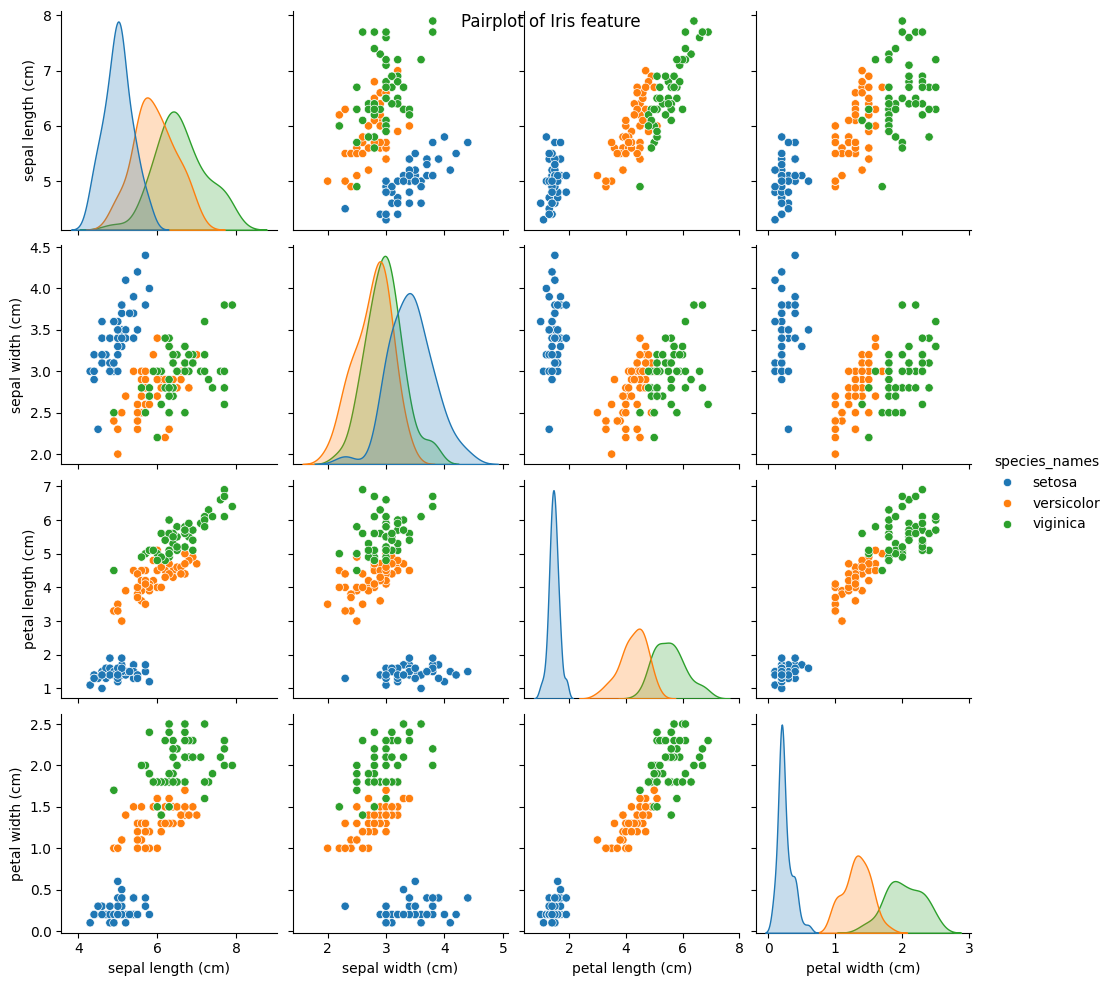

In [170]:
sb.pairplot(df,hue="species_names")
plt.suptitle("Pairplot of Iris feature")
plt.show()

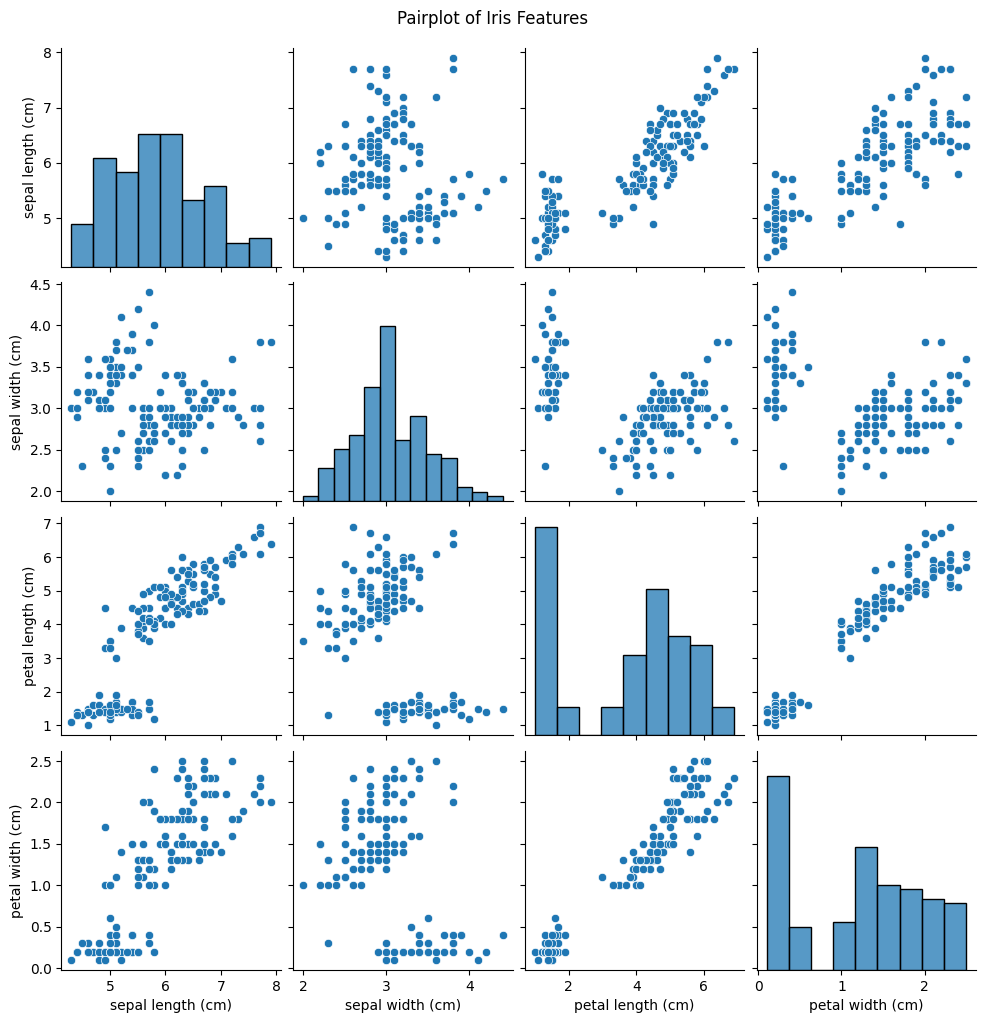

In [171]:
sb.pairplot(df)
plt.suptitle('Pairplot of Iris Features', y = 1.02)
plt.show()

**Insight**
* We are able to observe 2 pure clusters in the data but in actual we have 3
* Setosa shows different pattern than (versicolor and virginica)
* Since we know the answer,still we will choose k=3,so that we can see the potential of K-MEANS

**Data Preprocessing**
* Standardize the data

In [172]:
from sklearn.preprocessing import StandardScaler

In [173]:
x_feature=df.drop("species_names",axis=1)

In [174]:
x_feature

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [175]:
scaler=StandardScaler()
x_scaled = scaler.fit_transform(x_feature)
x_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [176]:
df_scaled = pd.DataFrame(x_scaled, columns = feature_names)
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,-1.468455e-15,1.00335,-1.870024,-0.900681,-0.052506,0.674501,2.492019
sepal width (cm),150.0,-1.823726e-15,1.00335,-2.433947,-0.592373,-0.131979,0.558611,3.090775
petal length (cm),150.0,-1.610564e-15,1.00335,-1.567576,-1.226552,0.336478,0.762758,1.785832
petal width (cm),150.0,-9.473903e-16,1.00335,-1.447076,-1.183812,0.132510,0.790671,1.712096


**Insight**
* Notice how after scaling, meand is effectively change to 0 and STD to 1 for all feaures.

In [177]:
from sklearn.cluster import KMeans

In [178]:
wcss = []
for k in range(1,11):
  km = KMeans(n_clusters=k, init = "k-means++", n_init = 10, random_state=42)
  km.fit(df_scaled)
  wcss.append(km.inertia_) # wcss

In [179]:
wcss

[600.0,
 222.36170496502302,
 139.82049635974974,
 114.09254690403094,
 90.92751382392049,
 81.54439095511782,
 72.6311438266719,
 62.540605695781245,
 55.119492805290584,
 47.39103517634709]

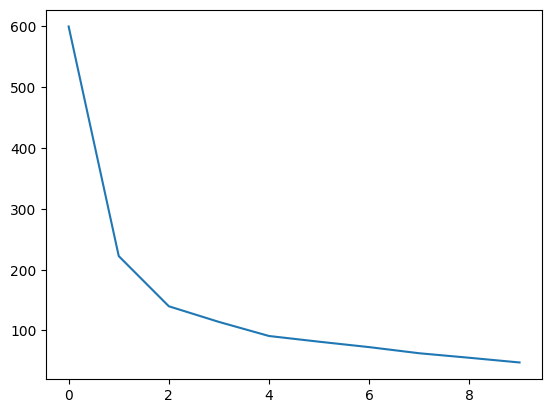

In [180]:
plt.plot(wcss)
plt.show()

**Let's see the elbow graph**

In [181]:
wcss = []
for k in range(1,11):
  km = KMeans(n_clusters=k, init = "k-means++", n_init = 10, random_state=42)
  km.fit(df_scaled)
  wcss.append(km.inertia_) # wcss

In [182]:
wcss

[600.0,
 222.36170496502302,
 139.82049635974974,
 114.09254690403094,
 90.92751382392049,
 81.54439095511782,
 72.6311438266719,
 62.540605695781245,
 55.119492805290584,
 47.39103517634709]

**Let's see the Elbow Graph**

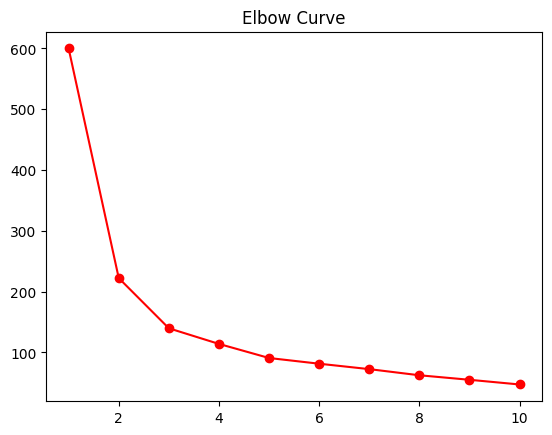

In [183]:
plt.plot(range(1,11), wcss, marker = 'o',color = 'Red')
plt.title('Elbow Curve')
plt.show()

**K=3**

**Method 2: The Silhoutte Score**

It tells how much well spepreated and compact the clusters are

Score range - 1 To +1:
* +1 =  Perfectly seperated cluster
* 0 = Overlapping clusters
* -1 = Points are assigned in the wrong cluster

In [184]:
from sklearn.metrics import silhouette_score

In [185]:
sih_score = []
for k in range(2,11): # silhouette score need at least 2 cluster
  km = KMeans(n_clusters=k, init = "k-means++", n_init = 10, random_state=42)
  km.fit(df_scaled)
  score = silhouette_score(x_scaled, km.labels_)
  sih_score.append(score)

In [186]:
sih_score

[np.float64(0.5817500491982808),
 np.float64(0.45994823920518635),
 np.float64(0.38694104154427816),
 np.float64(0.3459012795948778),
 np.float64(0.31707940193569023),
 np.float64(0.3201967939183684),
 np.float64(0.33869173894897225),
 np.float64(0.3423598384813203),
 np.float64(0.3517926760640288)]

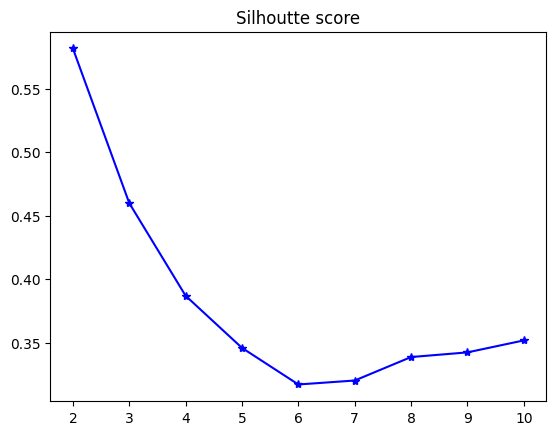

In [187]:
plt.plot(range(2,11), sih_score, marker ='*', color ='Blue')
plt.title('Silhoutte score')
plt.show()

**Now, we will build our model with k = 3**



In [188]:
k = 3
km_final = KMeans(n_clusters=k, init = 'k-means++', n_init = 10, random_state=42)
km_final.fit(x_scaled) # we are not providing target ---> unsupervised

KMeans(n_clusters=3, n_init=10, random_state=42)

In [189]:
cluster_labels = km_final.labels_
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

**Let's Get the centroid value for features**



In [190]:
centroid_scaled = km_final.cluster_centers_
centroid_scaled

array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

In [191]:
df['cluster'] = cluster_labels
df_scaled['cluster'] = cluster_labels
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_names,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


**We will scale back the data to original value**


In [192]:
centroid_original = scaler.inverse_transform(centroid_scaled)
centroid_original

array([[5.80188679, 2.67358491, 4.36981132, 1.41320755],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.78085106, 3.09574468, 5.5106383 , 1.97234043]])

In [193]:
centroid_df = pd.DataFrame(centroid_original, columns = feature_names)
centroid_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.801887,2.673585,4.369811,1.413208
1,5.006000,3.428000,1.462000,0.246000
2,6.780851,3.095745,5.510638,1.972340


**Truth Graph**

In [194]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_names,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [195]:
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species_names', 'cluster'],
      dtype='object')


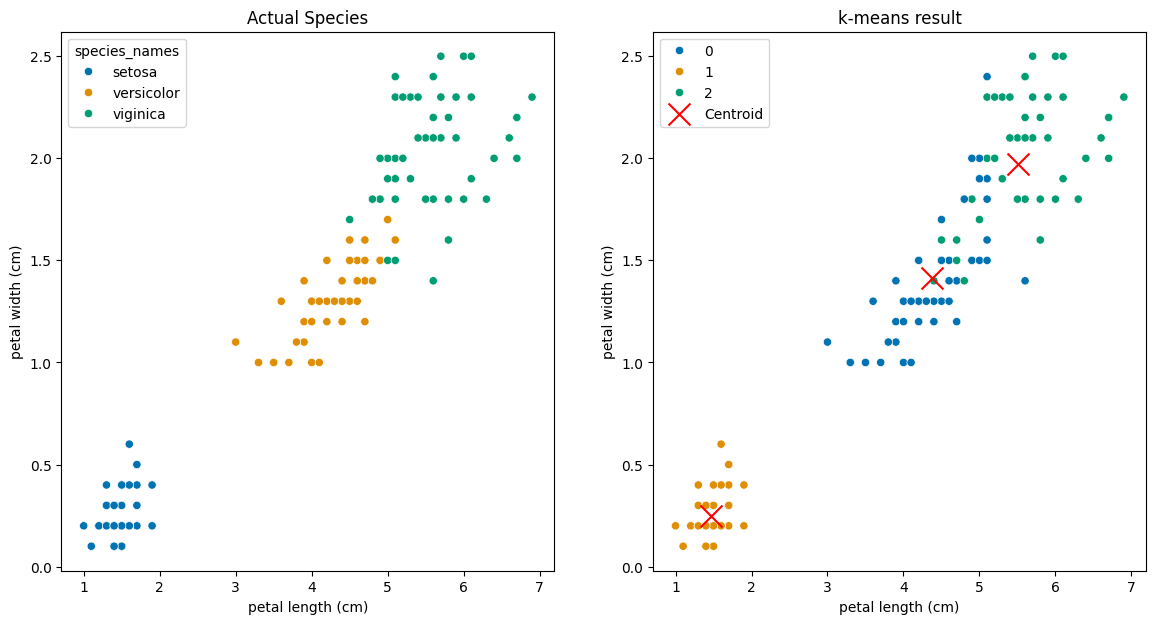

In [196]:
plt.figure(figsize = (14,7))
plt.subplot(1,2,1)
sb.scatterplot(data = df, x = 'petal length (cm)', y ='petal width (cm)', hue = 'species_names', palette = 'colorblind')
plt.title('Actual Species')

plt.subplot(1,2,2)
sb.scatterplot(data = df, x = 'petal length (cm)', y ='petal width (cm)', hue = 'cluster', palette = 'colorblind')
plt.title('k-means result')

plt.scatter(centroid_df['petal length (cm)'], centroid_df['petal width (cm)'],s = 250, marker = 'x',label = 'Centroid',color = 'Red')
plt.legend()
plt.show()

###**Your Practice**

In [197]:
from sklearn.datasets import make_blobs # auto create data clusters

In [198]:
x , y = make_blobs(n_samples=1000, centers = 3, n_features=2, random_state=42)
x.shape, y.shape

((1000, 2), (1000,))

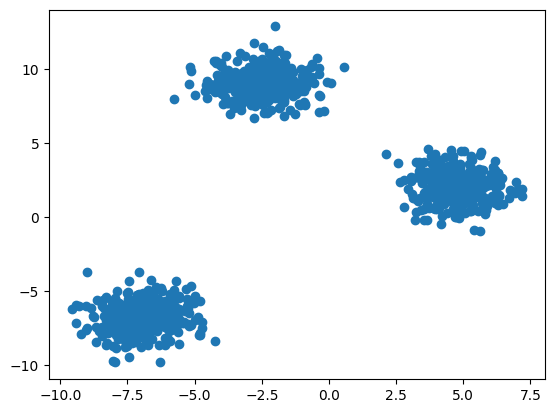

In [199]:
plt.scatter(x[:,0], x[:,1])
plt.show()

**Task**
* Find the optimal K value using both, Elbow method and Silhoutte score
* Train the model
* Find the centroid
* Plot the graph of True clusters and Predicted clusters with Centroid

**Let's Find the Elbow Graph**

In [200]:
wcss = []
for k in range(1,11):
  km = KMeans(n_clusters=k, init = 'k-means++', n_init = 10, random_state=42)
  km.fit(x)
  wcss.append(km.inertia_) # wcss

In [201]:
wcss

[66571.67201089082,
 18773.018255690855,
 1950.8814994726636,
 1713.2876690834453,
 1500.1243636991394,
 1272.667099005896,
 1122.348626633508,
 991.45956062531,
 872.8169321468988,
 795.3233426406939]

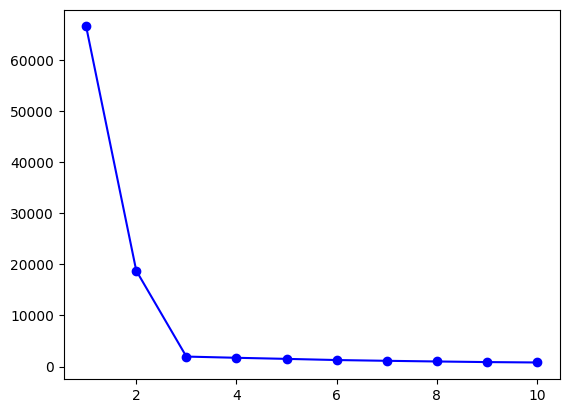

In [202]:
plt.plot(range(1,11), wcss, '-bo')
plt.show()

**k = 3**

In [203]:
km = KMeans(n_clusters=3)
y_label = km.fit_predict(x)

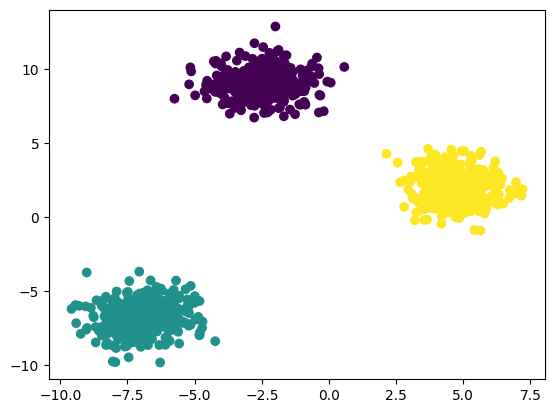

In [204]:
plt.scatter(x[:,0],x[:,1], c = y_label)
plt.show()

#**Kneed Locater**

In [205]:
pip install kneed

In [206]:
from kneed import KneeLocator

In [207]:
kl = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
kl.elbow

np.int64(3)

# **Sih_coff**

In [208]:
sih_coff = []
for k in range(2,11):
  km = KMeans(n_clusters=k, init = 'k-means++', n_init = 10, random_state=42)
  km.fit(x)
  score = silhouette_score(x, km.labels_)
  sih_coff.append(score)

In [209]:
sih_coff

[np.float64(0.7052841810631846),
 np.float64(0.8435705873891368),
 np.float64(0.6751442774590481),
 np.float64(0.5090143491761324),
 np.float64(0.3246963738582599),
 np.float64(0.33525692243708693),
 np.float64(0.33675777728005635),
 np.float64(0.33685843783846126),
 np.float64(0.3384036378584733)]

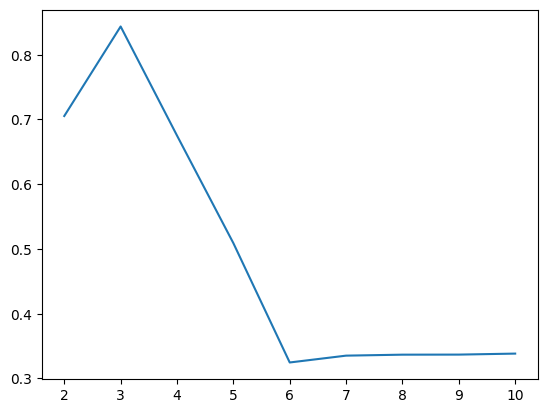

In [210]:
plt.plot(range(2,11), sih_coff)
plt.show()